In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score


merged_data = pd.read_csv(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\simulation_results.csv")

X = merged_data[
    [
        "wealth",
            "career_years",
            "sex",
            "job_status",
            "has_disease",
            "has_car",
            "has_house",
            "num_children",
            "personal_luxuries",
            "health_care_cost",
    ]
]

y = merged_data["group"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

y.value_counts()

group
1    21086
0    18946
Name: count, dtype: int64

In [2]:
model = joblib.load(r"C:\Users\mcarl\OneDrive\Ambiente de Trabalho\Modelação e Simulaçao\MS_G18_2425\models\LightGBM_nl.pkl")
y_pred = model.predict(X_test)

disease = X_test["has_disease"]

mf = MetricFrame(
    metrics=accuracy_score, y_true=y_test, y_pred=y_pred, sensitive_features=disease
)

print("Overall Metric Frame: ", mf.overall)
print("\nMetric Frame by group: ", mf.by_group)

C:\Users\mcarl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.6.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Overall Metric Frame:  0.6201498751040799

Metric Frame by group:  has_disease
False    0.754860
True     0.504183
Name: accuracy_score, dtype: float64


The Overall Metric Frame value of 0.6201 represents the specified overall performance metric (accuracy) across all groups combined. This suggests that the model’s accuracy is about 62.0% when evaluated on the entire dataset, without differentiating between groups based on the Diseases feature.

array([[<Axes: title={'center': 'accuracy'}, xlabel='has_disease'>,
        <Axes: title={'center': 'precision'}, xlabel='has_disease'>,
        <Axes: title={'center': 'false positive rate'}, xlabel='has_disease'>],
       [<Axes: title={'center': 'false negative rate'}, xlabel='has_disease'>,
        <Axes: title={'center': 'selection rate'}, xlabel='has_disease'>,
        <Axes: title={'center': 'count'}, xlabel='has_disease'>],
       [<Axes: xlabel='has_disease'>, <Axes: xlabel='has_disease'>,
        <Axes: xlabel='has_disease'>]], dtype=object)

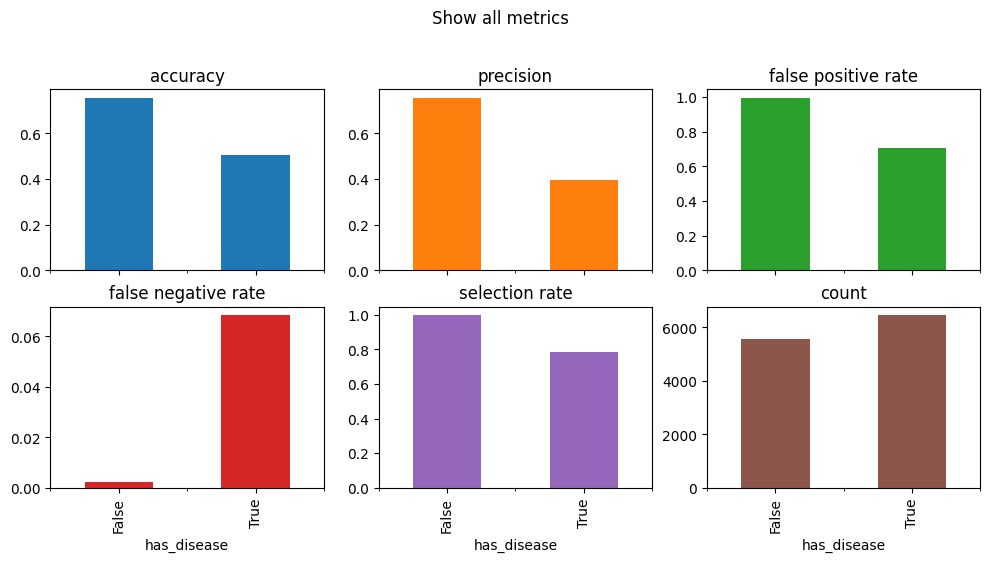

In [3]:
from fairlearn.metrics import (MetricFrame,  false_positive_rate,
    false_negative_rate, selection_rate, count)
from sklearn.metrics import (
    accuracy_score,
    precision_score
)

metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "false positive rate": false_positive_rate,
    "false negative rate": false_negative_rate,
    "selection rate": selection_rate,
    "count": count,
}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=disease
)

metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [4]:
from fairlearn.reductions import DemographicParity, ExponentiatedGradient

np.random.seed(42)

constraint = DemographicParity()
disease = X_train["has_disease"]
mitigator = ExponentiatedGradient(model, constraint)
mitigator.fit(X_train, y_train, sensitive_features=disease)

y_pred_mitigated = mitigator.predict(X_test)

disease = X_test["has_disease"]
sr_mitigated = MetricFrame(metrics=selection_rate, y_true=y_test, y_pred=y_pred_mitigated, sensitive_features=disease)

sr_mitigated.overall

0.44621149042464614

In [5]:
print("\nMetric Frame by group: ", sr_mitigated.by_group)


Metric Frame by group:  has_disease
False    0.453384
True     0.440037
Name: selection_rate, dtype: float64
